In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
data = pd.concat([df1,df2] , axis=0)
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
data.shape

(129880, 25)

In [5]:
data.drop(columns= ["Unnamed: 0" ,"id"], inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

In [7]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isna().sum().sum()

0

In [10]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25971    False
25972    False
25973    False
25974    False
25975    False
Length: 129487, dtype: bool

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Online boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Seat comfort,129487.0,3.441589,1.319168,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129487.0,3.358067,1.334149,0.0,2.0,4.0,4.0,5.0


In [12]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

**فى -----> outliers 😂😂😂ومش عارف احلها** 

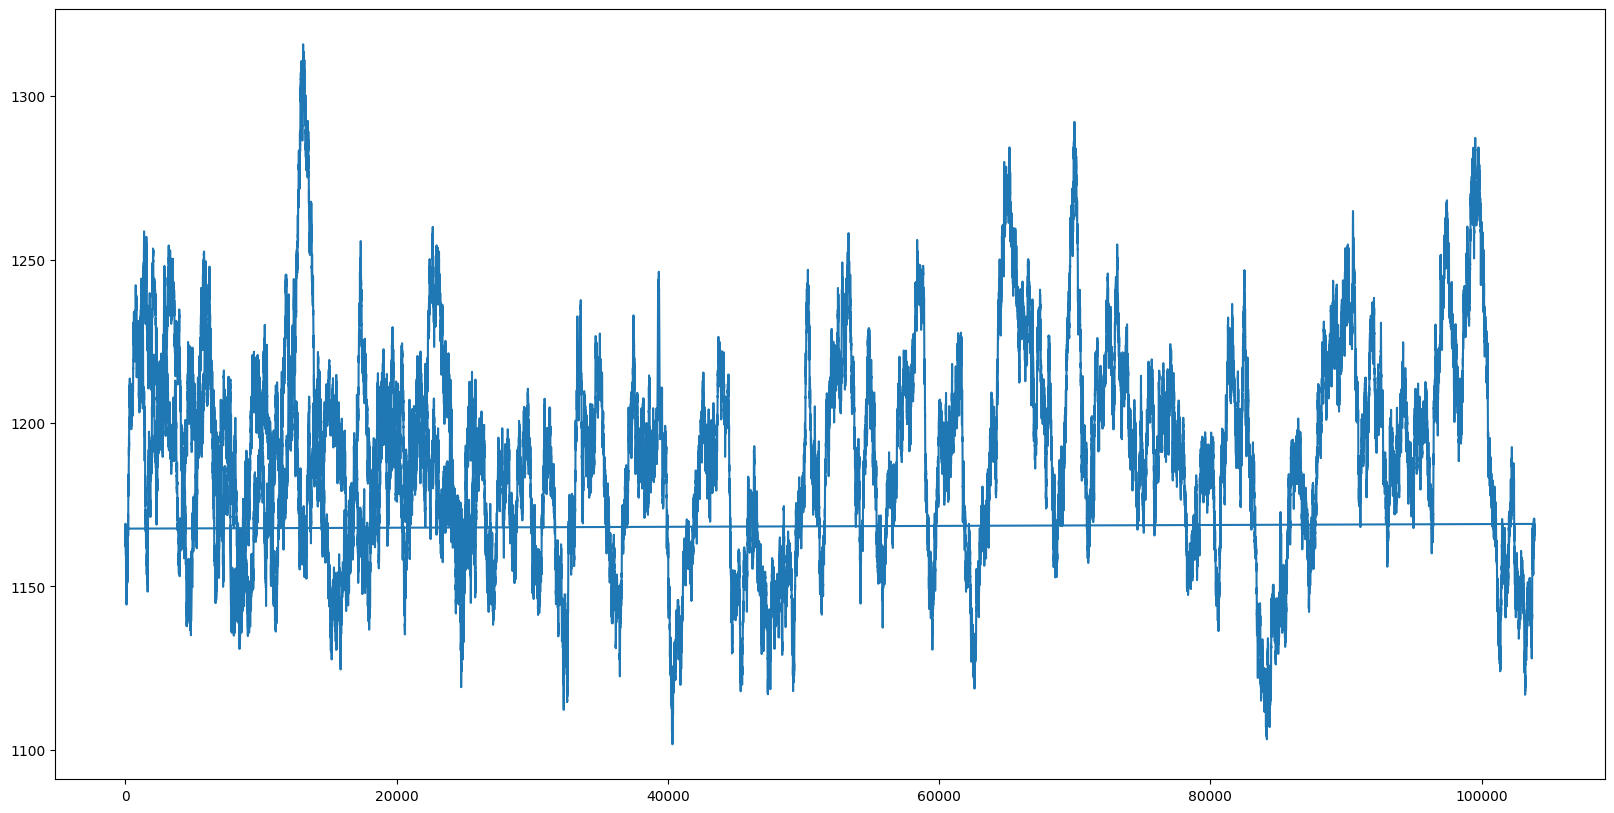

In [13]:
data['Flight Distance'].rolling(window=1000).mean().plot(figsize=(20,10))
plt.show()

In [14]:
data["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

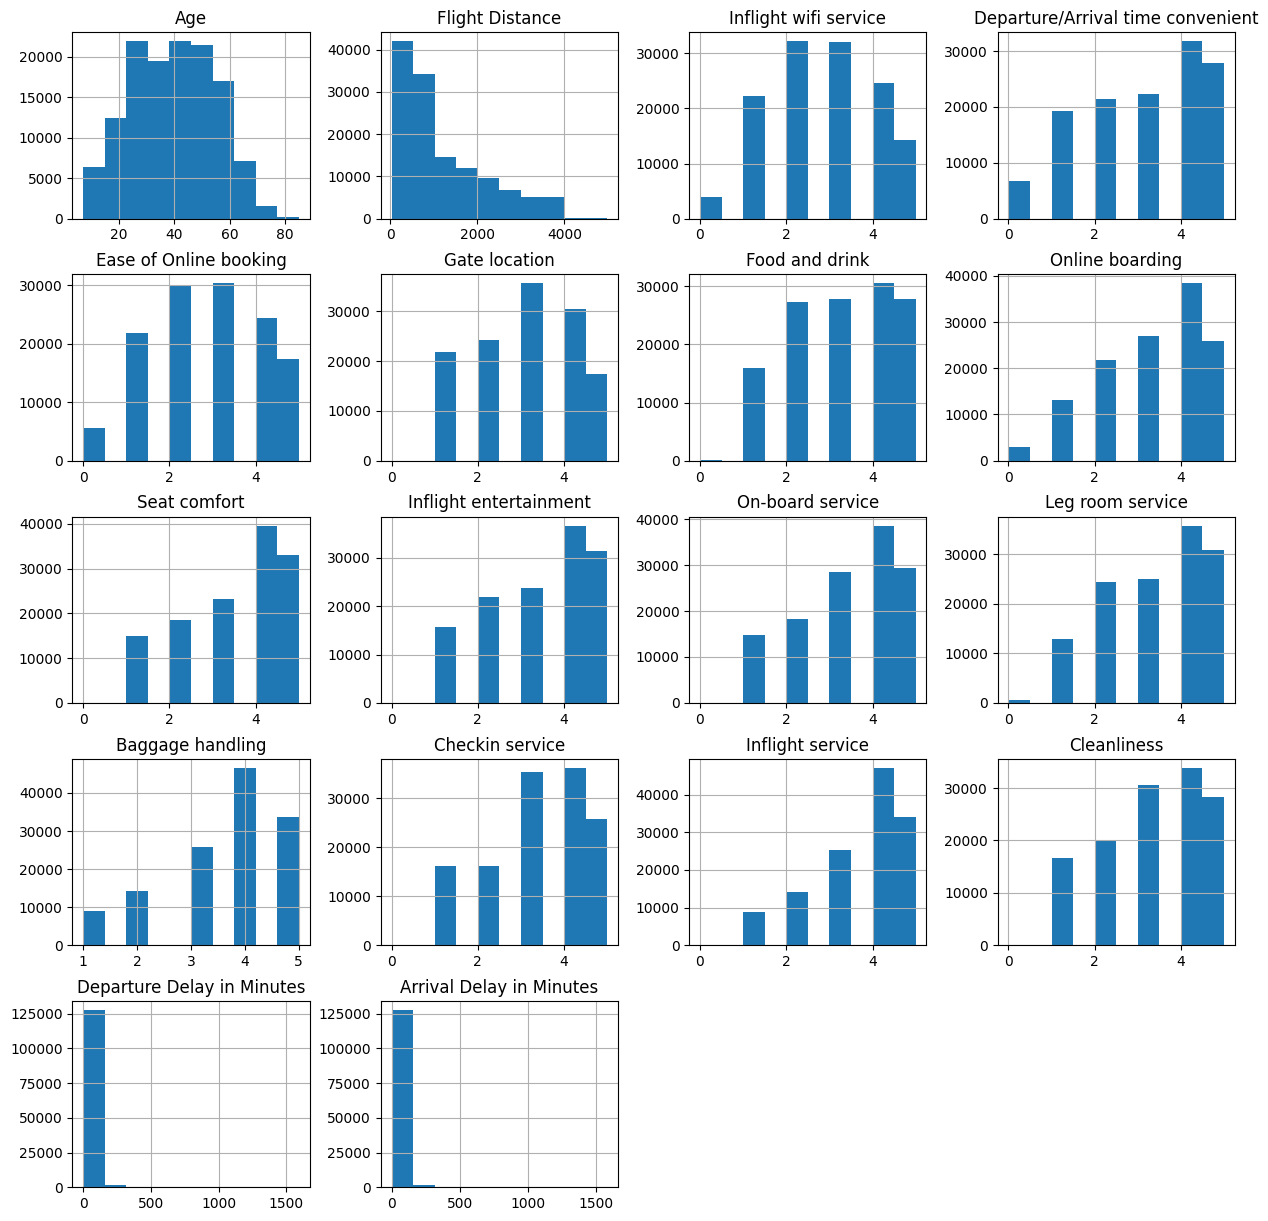

In [15]:
data.hist(figsize=(15,15))
plt.show()

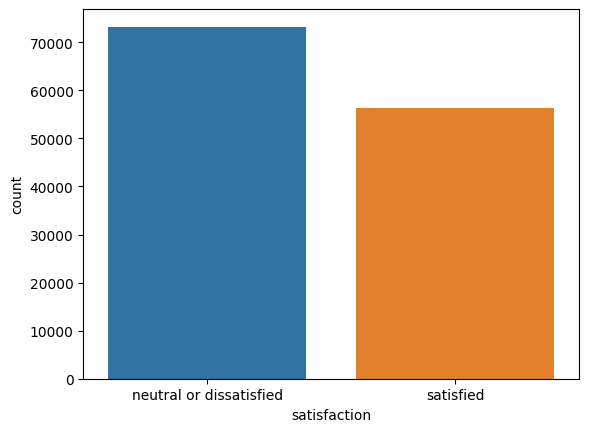

In [16]:
sns.countplot(data = data , x = "satisfaction" , hue="satisfaction");

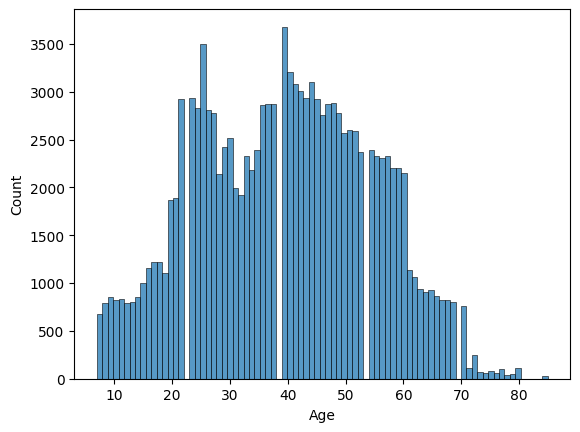

In [17]:
sns.histplot(data= data , x="Age" );

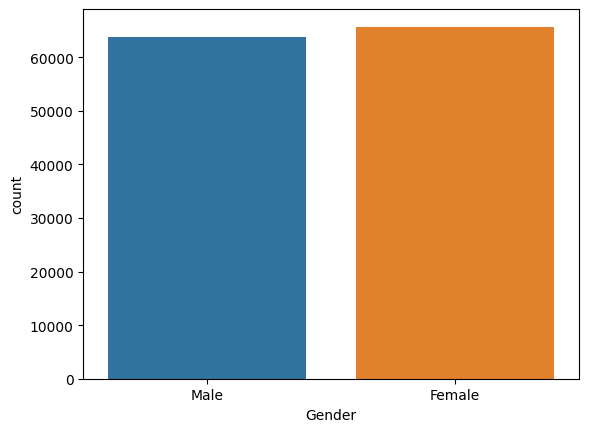

In [18]:
sns.countplot(data=data , x="Gender" , hue= "Gender" 
              ,legend='auto' );

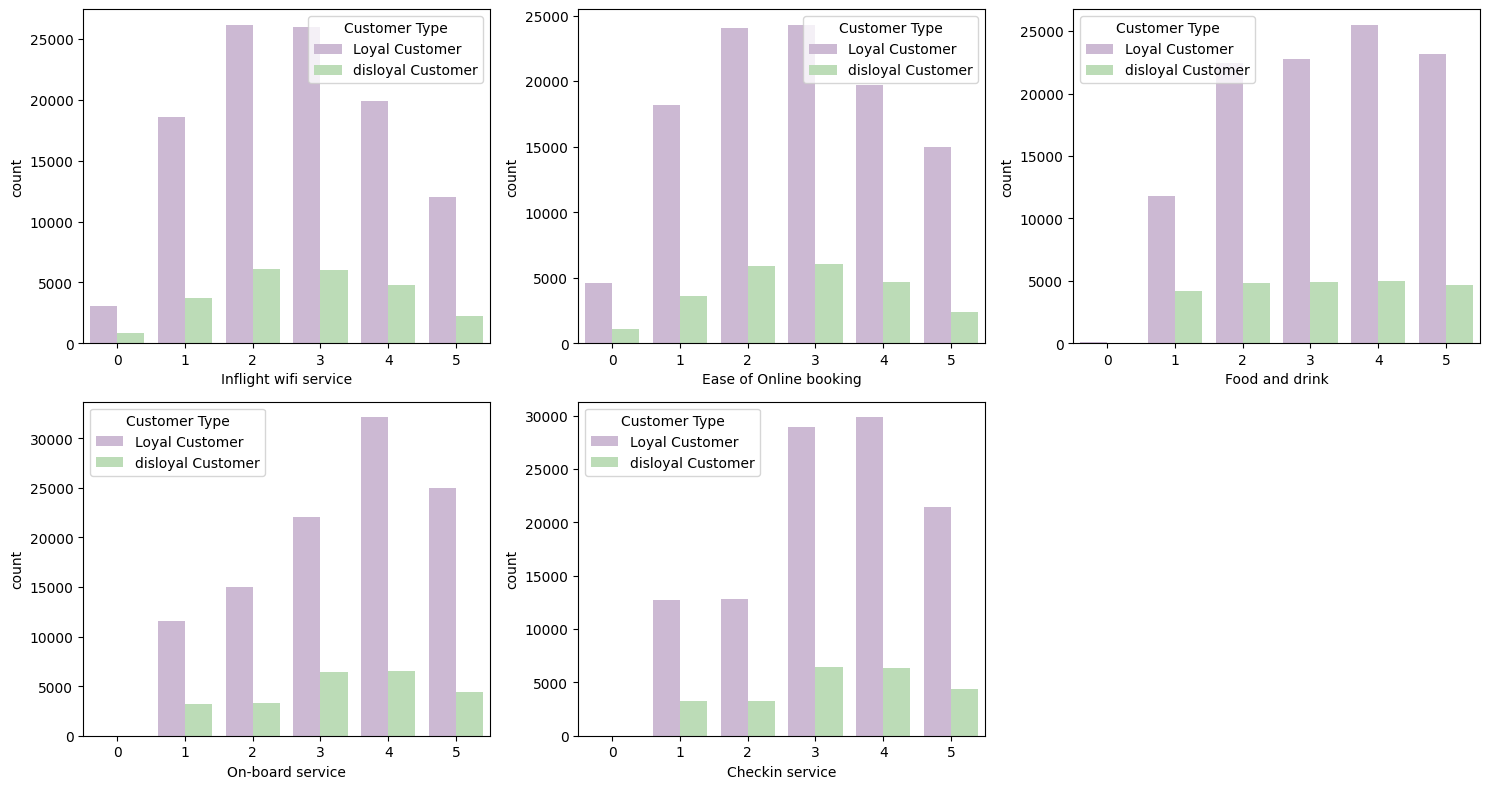

In [19]:
plt.figure(figsize=(15,8))
col=['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'On-board service', 'Checkin service']
for n,i in enumerate(col):
    plt.subplot(2,3,n+1)
    sns.countplot(x=i,data=data,palette='PRGn',hue="Customer Type")
   
    
plt.tight_layout()   
plt.show()

<Axes: xlabel='Flight Distance', ylabel='Age'>

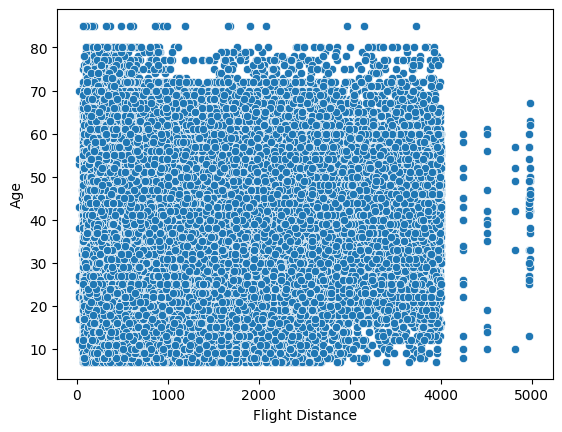

In [22]:
sns.scatterplot(data , x="Flight Distance" , y="Age")